### Задание 1

In [25]:
import pandas as pd

# Загрузка данных из файла insurance.csv
df_insurance = pd.read_csv('insurance.csv')

# Вывод первых 5 строк для проверки
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Задание 2

In [26]:
# Вывод статистики по данным
df_insurance.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Задание 3

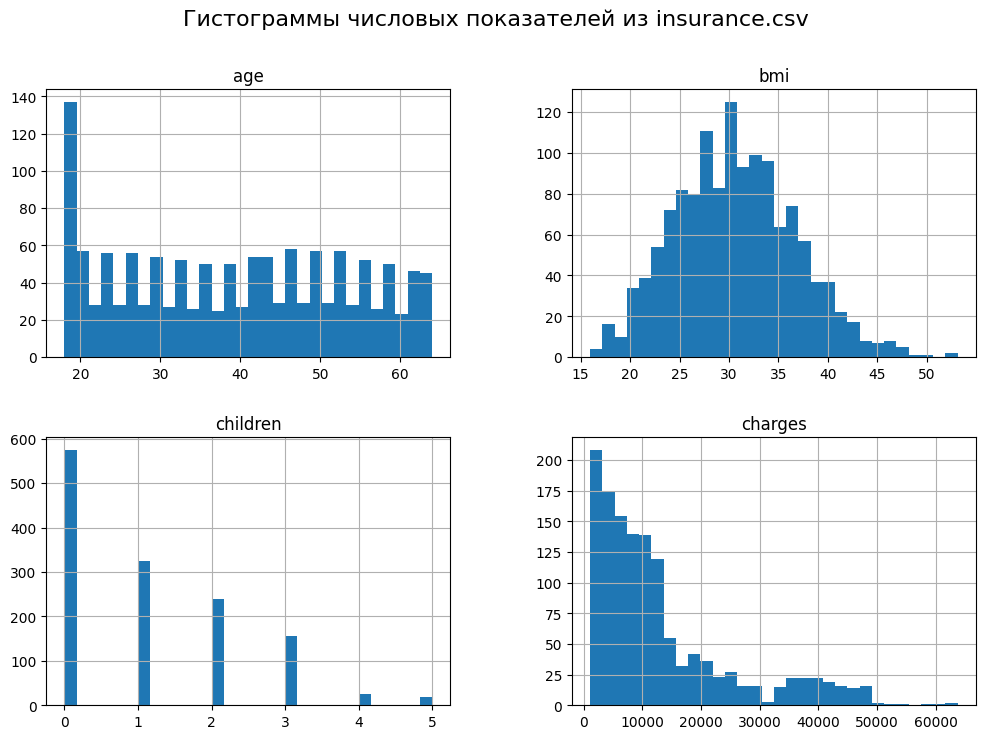

In [27]:
import matplotlib.pyplot as plt

# Построим гистограммы для числовых показателей
df_insurance.hist(bins=30, figsize=(12, 8))
plt.suptitle('Гистограммы числовых показателей из insurance.csv', fontsize=16)
plt.show()

### Задание 4

Среднее, медиана и стандартное отклонение для 'bmi': 30.66339686098655, 30.4, 6.098186911679014
Среднее, медиана и стандартное отклонение для 'charges': 13270.422265141257, 9382.033, 12110.011236694001


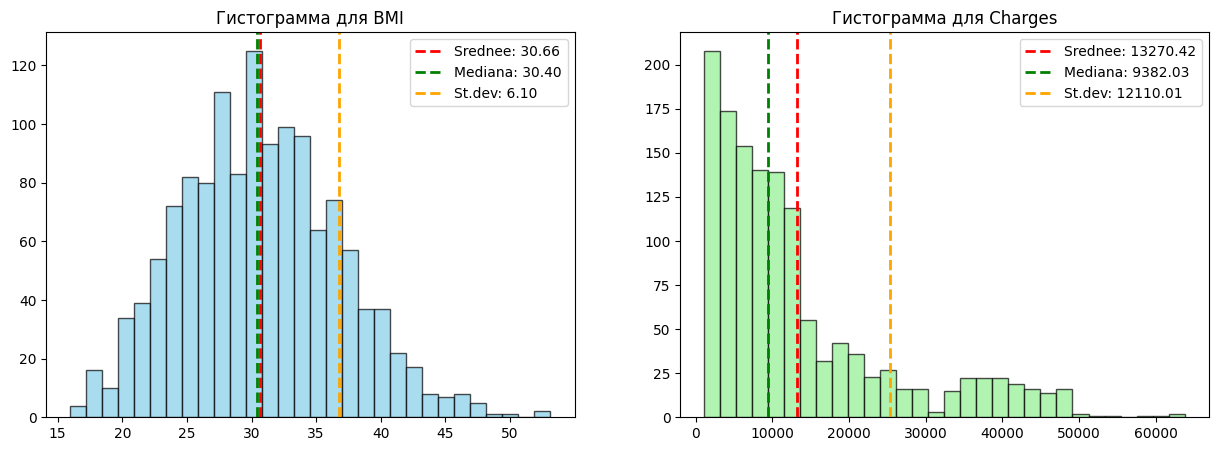

In [28]:
# Найдём меры центральной тенденции и разброса
bmi_mean = df_insurance['bmi'].mean()
bmi_median = df_insurance['bmi'].median()
bmi_std = df_insurance['bmi'].std()

charges_mean = df_insurance['charges'].mean()
charges_median = df_insurance['charges'].median()
charges_std = df_insurance['charges'].std()

print(f"Среднее, медиана и стандартное отклонение для 'bmi': {bmi_mean}, {bmi_median}, {bmi_std}")
print(f"Среднее, медиана и стандартное отклонение для 'charges': {charges_mean}, {charges_median}, {charges_std}")

# Построим гистограммы с вертикальными линиями на графике
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма для 'bmi'
axs[0].hist(df_insurance['bmi'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axs[0].axvline(bmi_mean, color='red', linestyle='dashed', linewidth=2, label=f'Srednee: {bmi_mean:.2f}')
axs[0].axvline(bmi_median, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {bmi_median:.2f}')
axs[0].axvline(bmi_mean + bmi_std, color='orange', linestyle='dashed', linewidth=2, label=f'St.dev: {bmi_std:.2f}')
axs[0].legend()
axs[0].set_title('Гистограмма для BMI')

# Гистограмма для 'charges'
axs[1].hist(df_insurance['charges'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axs[1].axvline(charges_mean, color='red', linestyle='dashed', linewidth=2, label=f'Srednee: {charges_mean:.2f}')
axs[1].axvline(charges_median, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {charges_median:.2f}')
axs[1].axvline(charges_mean + charges_std, color='orange', linestyle='dashed', linewidth=2, label=f'St.dev: {charges_std:.2f}')
axs[1].legend()
axs[1].set_title('Гистограмма для Charges')

plt.show()


### Задание 5

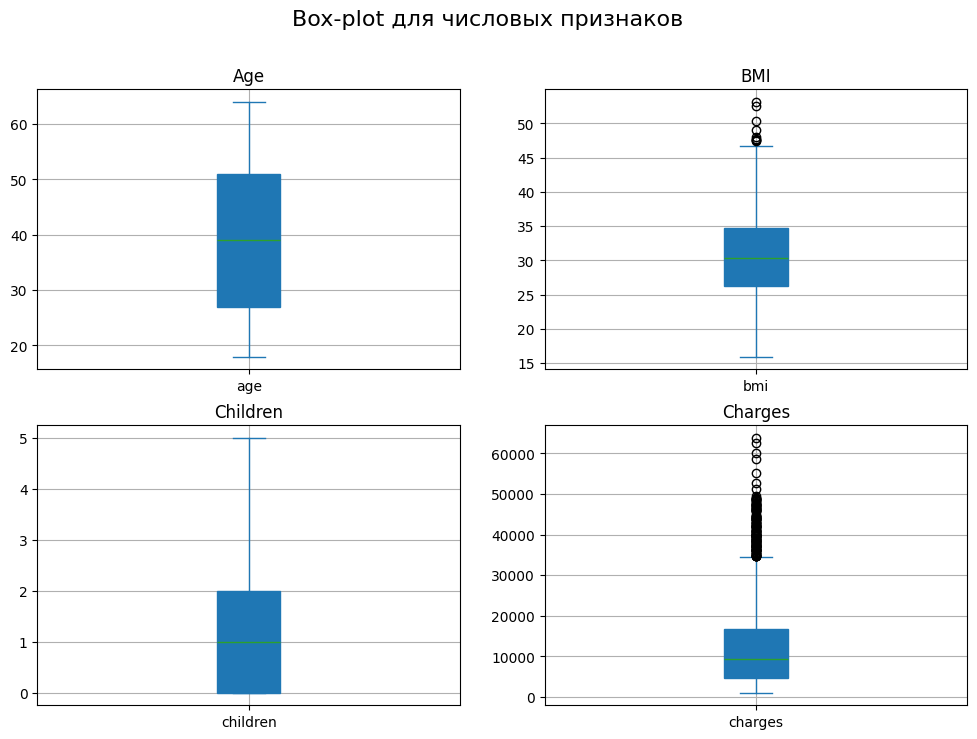

In [29]:
# Построим box-plot для всех числовых признаков
df_insurance[['age', 'bmi', 'children', 'charges']].plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8), patch_artist=True, grid=True, title=["Age", "BMI", "Children", "Charges"])
plt.suptitle('Box-plot для числовых признаков', fontsize=16)
plt.show()


### Задание 6

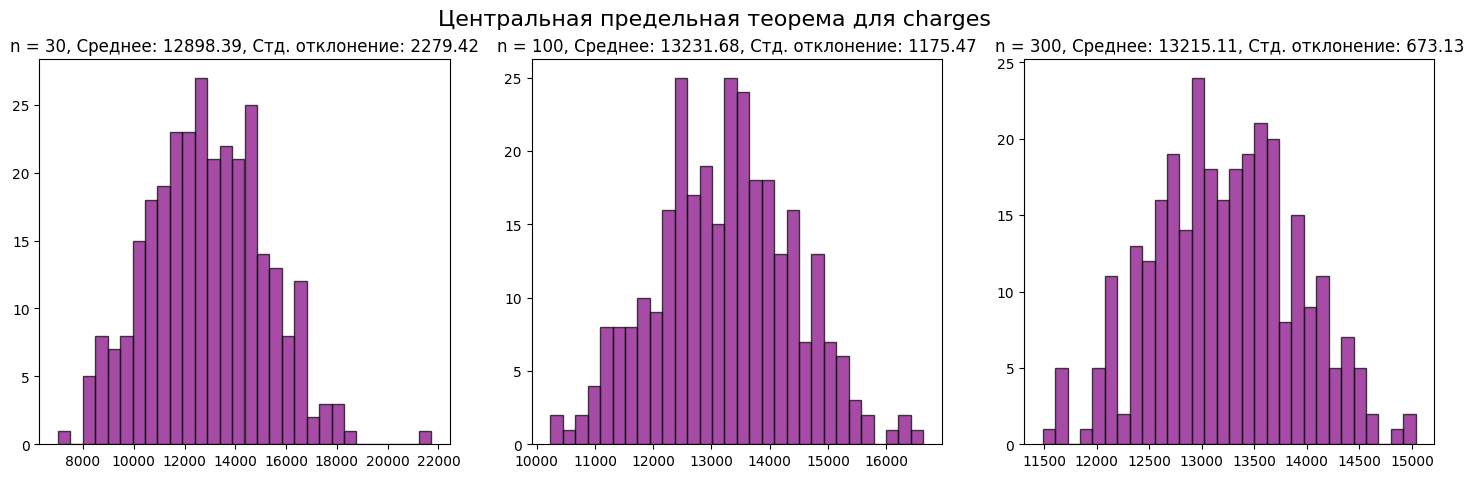

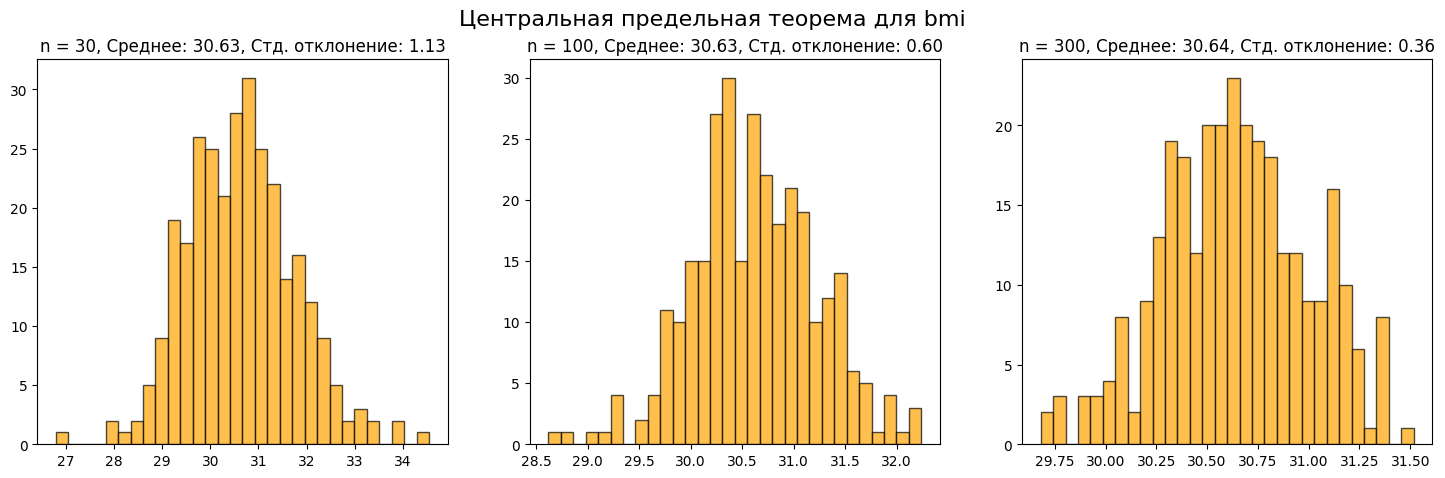

In [30]:
import numpy as np

# Функция для генерации выборок и построения гистограмм
def check_central_limit_theorem(data, n_samples, sample_size):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(data, sample_size)
        sample_means.append(np.mean(sample))
    return np.array(sample_means)

# Параметры
n_samples = 300

# Для charges
sample_sizes = [30, 100, 300]
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, size in enumerate(sample_sizes):
    sample_means = check_central_limit_theorem(df_insurance['charges'], n_samples, size)
    axs[i].hist(sample_means, bins=30, alpha=0.7, color='purple', edgecolor='black')
    axs[i].set_title(f'n = {size}, Среднее: {np.mean(sample_means):.2f}, Стд. отклонение: {np.std(sample_means):.2f}')

plt.suptitle('Центральная предельная теорема для charges', fontsize=16)
plt.show()

# Для bmi
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, size in enumerate(sample_sizes):
    sample_means = check_central_limit_theorem(df_insurance['bmi'], n_samples, size)
    axs[i].hist(sample_means, bins=30, alpha=0.7, color='orange', edgecolor='black')
    axs[i].set_title(f'n = {size}, Среднее: {np.mean(sample_means):.2f}, Стд. отклонение: {np.std(sample_means):.2f}')

plt.suptitle('Центральная предельная теорема для bmi', fontsize=16)
plt.show()


### Задание 7

In [31]:
import scipy.stats as stats

# Функция для вычисления доверительного интервала
def confidence_interval(data, confidence):
    mean = np.mean(data)
    sem = stats.sem(data)  # стандартная ошибка среднего
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

# 95% доверительный интервал для charges
ci_95_charges = confidence_interval(df_insurance['charges'], 0.95)
# 99% доверительный интервал для charges
ci_99_charges = confidence_interval(df_insurance['charges'], 0.99)

# 95% доверительный интервал для bmi
ci_95_bmi = confidence_interval(df_insurance['bmi'], 0.95)
# 99% доверительный интервал для bmi
ci_99_bmi = confidence_interval(df_insurance['bmi'], 0.99)

print(f"95% доверительный интервал для charges: {ci_95_charges}")
print(f"99% доверительный интервал для charges: {ci_99_charges}")
print(f"95% доверительный интервал для bmi: {ci_95_bmi}")
print(f"99% доверительный интервал для bmi: {ci_99_bmi}")


95% доверительный интервал для charges: (np.float64(12620.954034192644), np.float64(13919.890496089869))
99% доверительный интервал для charges: (np.float64(12416.429943203952), np.float64(14124.414587078561))
95% доверительный интервал для bmi: (np.float64(30.336346903054107), np.float64(30.99044681891899))
99% доверительный интервал для bmi: (np.float64(30.233355575431627), np.float64(31.09343814654147))


### Задание 8

KS-тест для bmi: p-значение = 0.3162798242838005
KS-тест для charges: p-значение = 4.381949677777398e-42


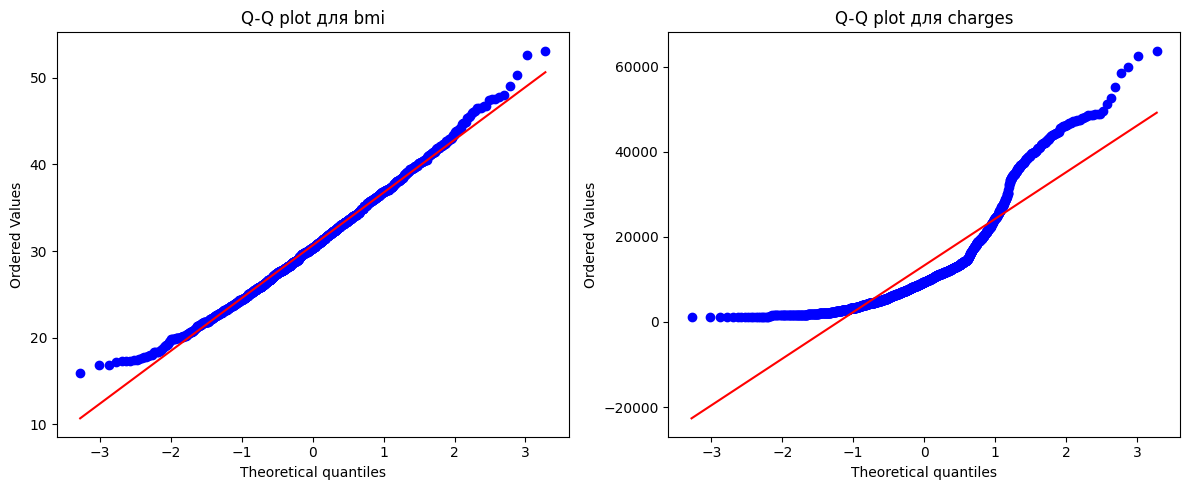

In [32]:
import scipy.stats as stats
import seaborn as sns

# KS-тест для нормальности
ks_bmi = stats.kstest(df_insurance['bmi'], 'norm', args=(df_insurance['bmi'].mean(), df_insurance['bmi'].std()))
ks_charges = stats.kstest(df_insurance['charges'], 'norm', args=(df_insurance['charges'].mean(), df_insurance['charges'].std()))

print(f"KS-тест для bmi: p-значение = {ks_bmi.pvalue}")
print(f"KS-тест для charges: p-значение = {ks_charges.pvalue}")

# Q-Q plot для bmi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(df_insurance['bmi'], dist="norm", plot=plt)
plt.title('Q-Q plot для bmi')

# Q-Q plot для charges
plt.subplot(1, 2, 2)
stats.probplot(df_insurance['charges'], dist="norm", plot=plt)
plt.title('Q-Q plot для charges')

plt.tight_layout()
plt.show()


### Задание 9

In [33]:
# Загрузка данных из файла ECDCCases.csv
df_cases = pd.read_csv('ECDCCases.csv')

# Вывод первых 5 строк для проверки
df_cases.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266


### Задание 10

In [34]:
# Проверим наличие пропущенных значений
missing_values = df_cases.isnull().mean() * 100
print("Процент пропущенных значений по каждому столбцу:")
print(missing_values)

# Найдем два признака с наибольшим количеством пропусков
most_missing_cols = missing_values.nlargest(2).index
print(f"Удалим признаки с наибольшим количеством пропусков: {most_missing_cols}")

# Удаляем два признака
df_cases_cleaned = df_cases.drop(columns=most_missing_cols)

# Заполняем пропуски
for column in df_cases_cleaned.columns:
    if df_cases_cleaned[column].dtype == 'object':  # если категориальный признак
        df_cases_cleaned[column].fillna('other', inplace=True)
    else:  # если числовой признак
        df_cases_cleaned[column].fillna(df_cases_cleaned[column].median(), inplace=True)

# Проверим, что больше нет пропусков
print("Остались ли пропуски?", df_cases_cleaned.isnull().sum().sum() == 0)


Процент пропущенных значений по каждому столбцу:
dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64
Удалим признаки с наибольшим количеством пропусков: Index(['Cumulative_number_for_14

C:\Users\1\AppData\Local\Temp\ipykernel_23828\2437307010.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cases_cleaned[column].fillna('other', inplace=True)
C:\Users\1\AppData\Local\Temp\ipykernel_23828\2437307010.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### Задание 11

In [35]:
# Статистика по данным
df_cases_cleaned.describe()

# Вывод стран и количества дней, когда количество смертей превысило 3000
high_death_cases = df_cases_cleaned[df_cases_cleaned['deaths'] > 3000]
countries_with_high_deaths = high_death_cases['countriesAndTerritories'].value_counts()

print(f"Количество дней, когда количество смертей превысило 3000 по странам:")
print(countries_with_high_deaths)


Количество дней, когда количество смертей превысило 3000 по странам:
countriesAndTerritories
United_States_of_America    6
Peru                        2
Argentina                   1
Mexico                      1
Ecuador                     1
Name: count, dtype: int64


### Задание 12

In [36]:
# Проверим на наличие дубликатов
duplicate_rows = df_cases_cleaned.duplicated().sum()
print(f"Количество дубликатов в данных: {duplicate_rows}")

# Удалим дубликаты, если они есть
df_cases_cleaned = df_cases_cleaned.drop_duplicates()

# Проверим, сколько дубликатов осталось
print(f"Количество дубликатов после удаления: {df_cases_cleaned.duplicated().sum()}")


Количество дубликатов в данных: 4
Количество дубликатов после удаления: 0


### Задание 13

In [37]:
# Загрузка данных из файла bmi.csv
df_bmi = pd.read_csv('bmi.csv')

# Выборка для northwest и southwest
bmi_northwest = df_bmi[df_bmi['region'] == 'northwest']['bmi']
bmi_southwest = df_bmi[df_bmi['region'] == 'southwest']['bmi']

# Проверка на нормальность с помощью критерия Шапиро-Уилка
shapiro_northwest = stats.shapiro(bmi_northwest)
shapiro_southwest = stats.shapiro(bmi_southwest)

print(f"p-значение критерия Шапиро-Уилка для northwest: {shapiro_northwest.pvalue}")
print(f"p-значение критерия Шапиро-Уилка для southwest: {shapiro_southwest.pvalue}")

# Проверка на гомогенность дисперсии с помощью критерия Бартлетта
bartlett_test = stats.bartlett(bmi_northwest, bmi_southwest)
print(f"p-значение критерия Бартлетта: {bartlett_test.pvalue}")

# Сравнение средних значений с помощью t-критерия Стьюдента
t_test_result = stats.ttest_ind(bmi_northwest, bmi_southwest)
print(f"Результат t-критерия Стьюдента: p-значение = {t_test_result.pvalue}")


p-значение критерия Шапиро-Уилка для northwest: 0.4655897798883668
p-значение критерия Шапиро-Уилка для southwest: 0.36296471144790743
p-значение критерия Бартлетта: 0.06519347353581818
Результат t-критерия Стьюдента: p-значение = 0.001076958496307695


### Задание 14

In [38]:
# Данные по результатам бросков кубика
observed = [97, 98, 109, 95, 97, 104]

# Ожидаемое равномерное распределение (всего 600 бросков, равные шансы для каждого числа)
expected = [600 / 6] * 6

# Применение критерия хи-квадрат
chi2_test = stats.chisquare(observed, expected)
print(f"p-значение критерия хи-квадрат: {chi2_test.pvalue}")


p-значение критерия хи-квадрат: 0.9198882077437889


### Задание 15

In [39]:
# Создадим датафрейм
data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

# Применим критерий хи-квадрат для проверки зависимости
chi2_contingency_test = stats.chi2_contingency(data)
print(f"p-значение критерия хи-квадрат: {chi2_contingency_test[1]}")


p-значение критерия хи-квадрат: 1.7291616900960234e-21
